# Import basic libraries
## More libraries are imported lateer.
### I decided to import each library just where it's used.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import tensorflow as tf

# Define some useful constants

In [4]:
PATH = "path"
LABEL = "label"
AK = 'Ak'
ALA_IDRIS = "Ala_Idris"
BUZGULU = "Buzgulu"
DIMNIT = 'Dimnit'
NAZLI = 'Nazli'

IMG_HEIGHT = 255
IMG_WIDTH = 255
image_shape = (IMG_WIDTH, IMG_HEIGHT, 3)
image_size = (IMG_WIDTH, IMG_HEIGHT)

# Read the dataset and a quick review
## We just read the file paths. the libraries will open and process the images automatically

In [5]:
import os

dataset_path = "/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset"
leaves_labels = [AK, ALA_IDRIS, BUZGULU, DIMNIT, NAZLI]

for label in leaves_labels:
    print(f"{label}: {len(os.listdir(os.path.join(dataset_path, label)))} images")

Ak: 100 images
Ala_Idris: 100 images
Buzgulu: 100 images
Dimnit: 100 images
Nazli: 100 images


# Define a simple function to make a DataFrame out of each kink of leaf

In [6]:
import pandas as pd

def makeDf(label):
    df = pd.DataFrame()
    images = os.listdir(os.path.join(dataset_path, label))
    df[PATH] = [os.path.join(dataset_path, label, image_filename) for image_filename in images if image_filename.endswith(".png")] 
    df[LABEL] = label
    return df

# Building the datasets

In [7]:
dfs = dict()
dfs[AK] = makeDf(AK)
dfs[ALA_IDRIS] = makeDf(ALA_IDRIS)
dfs[BUZGULU] = makeDf(BUZGULU)
dfs[DIMNIT] = makeDf(DIMNIT)
dfs[NAZLI] = makeDf(NAZLI)

# Let's see how it looks

In [8]:
dfs[AK]

,path,label
0,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
1,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
2,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
3,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
4,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
...,...,...
95,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
96,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
97,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak
98,/content/drive/MyDrive/Grapevine_Leaves_Image_...,Ak


# Let's see a couple of examples

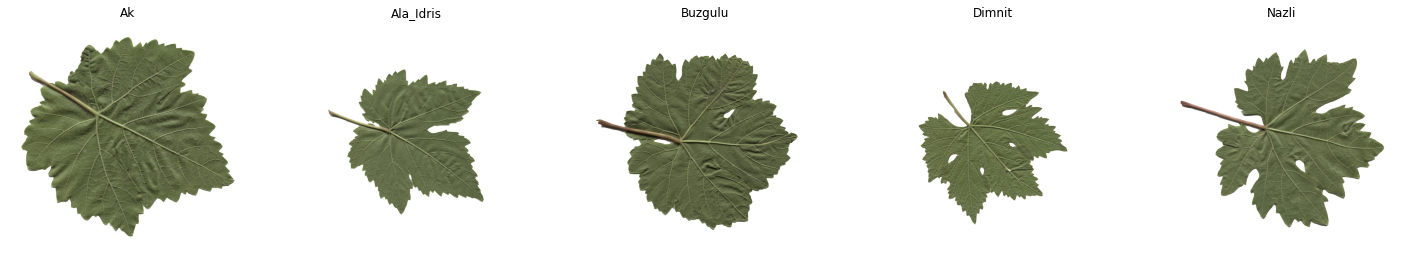

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

figure, axis = plt.subplots(1, len(leaves_labels), figsize=(25,5))
for i, label in enumerate(leaves_labels):
    axis[i].imshow(Image.open(dfs[label][PATH][50]))
    axis[i].axis('off')
    # axis[i].title(label)
    axis[i].set_title(label)

# plt.imshow(Image.open(ak_df[PATH][0]))
# plt.subplot()


# Split the data to "Test", "Validation" and "Train"

### To make the datasets perfectly balanced, instead of "mix then split" i did "split then mix" the 5 kinds of leaves. 

In [10]:
from sklearn.model_selection import train_test_split
x_trains = pd.DataFrame()
y_trains = pd.DataFrame()

x_validations = pd.DataFrame()
y_validations = pd.DataFrame()

x_tests = pd.DataFrame()
y_tests = pd.DataFrame()

for label in leaves_labels:
    label_df = dfs[label]
    label_Xs = label_df[PATH]
    label_Ys = label_df[LABEL]
    label_x_train, label_x_test, label_y_train, label_y_test = train_test_split(label_Xs, label_Ys, test_size=0.2, random_state=42)

    label_x_train, label_x_val, label_y_train, label_y_val = train_test_split(label_x_train, label_y_train, test_size=0.2, random_state=42)
    x_trains = pd.concat([x_trains, label_x_train])
    y_trains = pd.concat([y_trains, label_y_train])

    x_validations = pd.concat([x_validations, label_x_val])
    y_validations = pd.concat([y_validations, label_y_val])

    x_tests = pd.concat([x_tests, label_x_test])
    y_tests = pd.concat([y_tests, label_y_test])


x_trains.rename({0: PATH}, axis=1, inplace=True)
x_validations.rename({0: PATH}, axis=1, inplace=True)
x_tests.rename({0: PATH}, axis=1, inplace=True)


y_trains.rename({0: LABEL}, axis=1, inplace=True)
y_validations.rename({0: LABEL}, axis=1, inplace=True)
y_tests.rename({0: LABEL}, axis=1, inplace=True)

    

## Quick look at the shapes

In [11]:
print(f"x_trains shape: {x_trains.shape}")
print(f"y_trains shape: {y_trains.shape}")
print(f"x_validations shape: {x_validations.shape}")
print(f"y_validations shape: {y_validations.shape}")
print(f"x_tests shape: {x_tests.shape}")
print(f"y_tests shape: {y_tests.shape}")

x_trains shape: (320, 1)
y_trains shape: (320, 1)
x_validations shape: (80, 1)
y_validations shape: (80, 1)
x_tests shape: (100, 1)
y_tests shape: (100, 1)


## Quick review of the train part for instance

In [12]:
x_trains

,path
82,/content/drive/MyDrive/Grapevine_Leaves_Image_...
84,/content/drive/MyDrive/Grapevine_Leaves_Image_...
57,/content/drive/MyDrive/Grapevine_Leaves_Image_...
56,/content/drive/MyDrive/Grapevine_Leaves_Image_...
72,/content/drive/MyDrive/Grapevine_Leaves_Image_...
...,...
49,/content/drive/MyDrive/Grapevine_Leaves_Image_...
63,/content/drive/MyDrive/Grapevine_Leaves_Image_...
74,/content/drive/MyDrive/Grapevine_Leaves_Image_...
93,/content/drive/MyDrive/Grapevine_Leaves_Image_...


## And the y_train

In [13]:
y_trains

,label
82,Ak
84,Ak
57,Ak
56,Ak
72,Ak
...,...
49,Nazli
63,Nazli
74,Nazli
93,Nazli


## To use these datasets and feed them to the data generator we need to combine the x and y parts

In [14]:
train_data = pd.concat([x_trains, y_trains], axis=1)
validation_data = pd.concat([x_validations, y_validations], axis=1)
test_data = pd.concat([x_tests, y_tests], axis=1)

# The Augmentation

## First we define two kinds of generators. 
- data_generator: for the trains and validations augmentation
- test_data_generator: a very simple preprocessing to be compatible with the models in size
### And out of these two genertors we build the augmented data for each part

In [15]:
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense
from keras.models import Model
data_generator = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6, 1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

test_data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
) 


train_generator= data_generator.flow_from_dataframe(
        train_data,  
        x_col=PATH,
        y_col=LABEL,
        target_size=image_size, 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

val_generator = data_generator.flow_from_dataframe(
        validation_data, 
        x_col=PATH,
        y_col=LABEL,
        target_size=image_size, 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
test_generator = test_data_generator.flow_from_dataframe(
        test_data,  
        x_col=PATH,
        y_col=LABEL,
        target_size=image_size, 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
)

Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


# Let's see the augmented data among their original ones

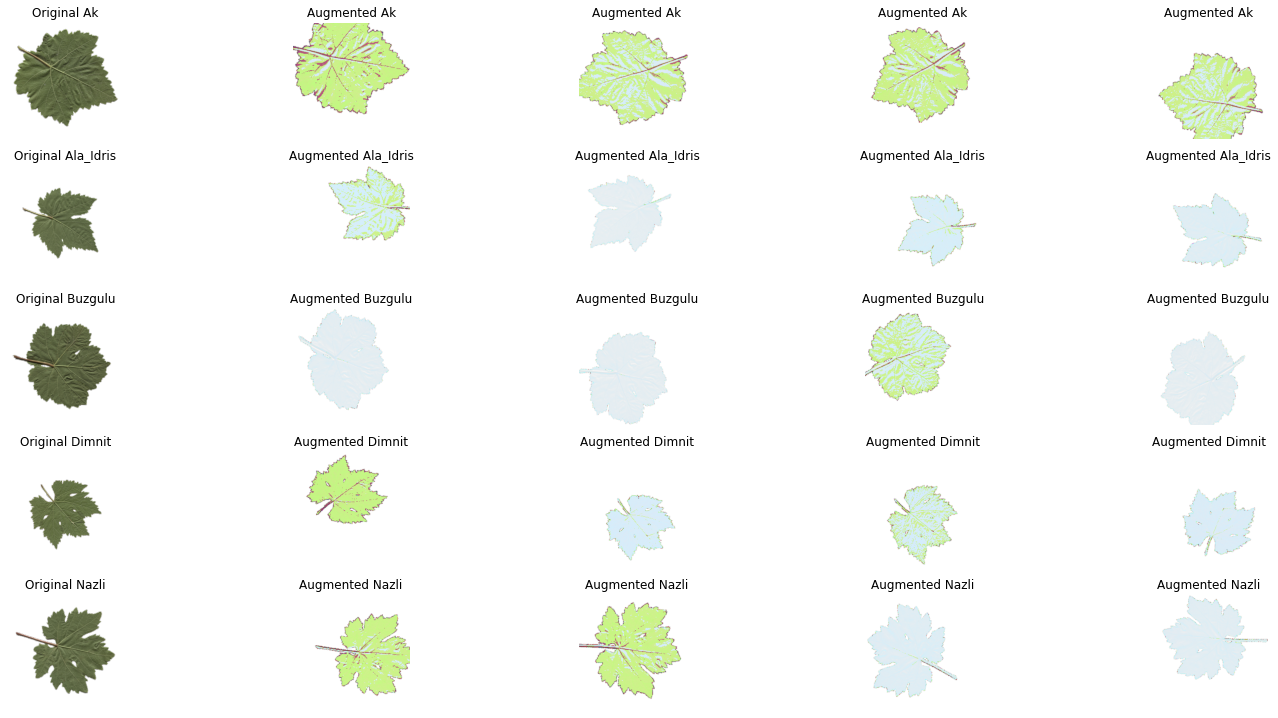

In [16]:
from numpy import expand_dims
plt.figure(figsize = (20,20))
paths = [dfs[label][PATH][50] for label in leaves_labels]
fig_num = 0
for i, path in enumerate(paths):
    data = Image.open(path)
    data = data.resize((224,224))
    samples = expand_dims(data, 0)
    it = data_generator.flow(samples, batch_size=1)

    # Original image
    plt.subplot(10,5, fig_num+1)
    plt.imshow(data)
    plt.axis('off')
    plt.title(f"Original {leaves_labels[i]}")
    # Augmented images
    for _ in range(4):
        fig_num += 1
        plt.subplot(10,5, fig_num+1)
        batch = it.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Augmented {leaves_labels[i]}")
    fig_num += 1

plt.tight_layout()
plt.show()

### Here we just define a simple callback to use in our model to do stuff better

In [17]:
model_check_point = tf.keras.callbacks.ModelCheckpoint("save_model_xception.h5",
                                                        save_best_only=True
)
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )
callbacks = [model_check_point]

# An important function to print the result and plot the corresponding diagrams

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
def report_results(model, y_true, y_predicted):
    y_predicted = np.argmax(y_predicted, axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    y_predicted = np.array([labels[k] for k in y_predicted])
    print(f"Accuracy score: {accuracy_score(y_true, y_predicted)}")
    print(classification_report(y_true, y_predicted))
    mat = confusion_matrix(y_true, y_predicted)
    sns.heatmap(mat, annot=True)
    

# Another important function to plot the model history progress

In [19]:
def plotModelHistory(history):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.legend(["Training", "Validation"])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(history.history['loss'], label="Training loss")
    plt.plot(history.history['val_loss'], label="Validation loss")
    plt.legend(["Training", "Validation"])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.show()

# Let's run the first model. We use a pretrained model called VGG19 and the build our model with "Model"
## Then compile it and fit

In [20]:
from tensorflow.keras.applications import VGG19
from keras.layers import GlobalAveragePooling2D
if True: # set to False to skip and go to next parts of code
    vgg19 = VGG19(include_top = False, input_shape=image_shape, weights = 'imagenet')

    for layer in vgg19.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(vgg19.output)
    predictions = Dense(5, activation='softmax')(x)

    vgg_model = Model(inputs = vgg19.input, outputs = predictions)

    vgg_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

    history_vgg = vgg_model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=50,
        verbose=2,
        callbacks=callbacks
    )

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/50
10/10 - 174s - loss: 2.1347 - accuracy: 0.2281 - val_loss: 1.9161 - val_accuracy: 0.2875 - 174s/epoch - 17s/step
Epoch 2/50
10/10 - 10s - loss: 1.9100 - accuracy: 0.2719 - val_loss: 1.7975 - val_accuracy: 0.3000 - 10s/epoch - 991ms/step
Epoch 3/50
10/10 - 10s - loss: 1.6268 - accuracy: 0.3625 - val_loss: 1.6682 - val_accuracy: 0.3125 - 10s/epoch - 1s/step
Epoch 4/50
10/10 - 10s - loss: 1.5368 - accuracy: 0.3625 - val_loss: 1.3925 - val_accuracy: 0.4625 - 10s/epoch - 998ms/step
Epoch 5/50
10/10 - 10s - loss: 1.3186 - accuracy: 0.4938 - val_loss: 1.3722 - val_accuracy: 0.4750 - 10s/epoch - 1s/step
Epoch 6/50
10/10 - 10s - loss: 1.2815 - accuracy: 0.4969 - val_loss: 1.3349 - val_accuracy: 0.4500 - 10s/epoch - 992ms/step
Epoch 7/50
10/10 - 10s - loss: 1.1675 - accuracy: 0.5188 - val_loss: 1.3101 - val_accuracy: 0.4250 - 10s/epoch - 1s/step
Epoch 8/50
10/10 - 10s - loss: 1.1558 - accuracy: 0.5469 - val_loss: 1.2692 

# Now evaluate the model

In [21]:
if True: # set to False to skip and go to next parts of code
    y_predicted = vgg_model.predict(test_generator)
    pred = vgg_model.evaluate(test_generator)

4/4 [==============================] - 1s 189ms/step - loss: 0.6202 - accuracy: 0.8200


Accuracy score: 0.82
              precision    recall  f1-score   support

          Ak       0.89      0.85      0.87        20
   Ala_Idris       0.88      0.70      0.78        20
     Buzgulu       0.71      0.75      0.73        20
      Dimnit       0.72      0.90      0.80        20
       Nazli       0.95      0.90      0.92        20

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



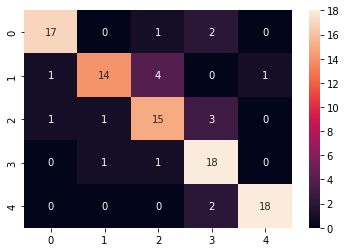

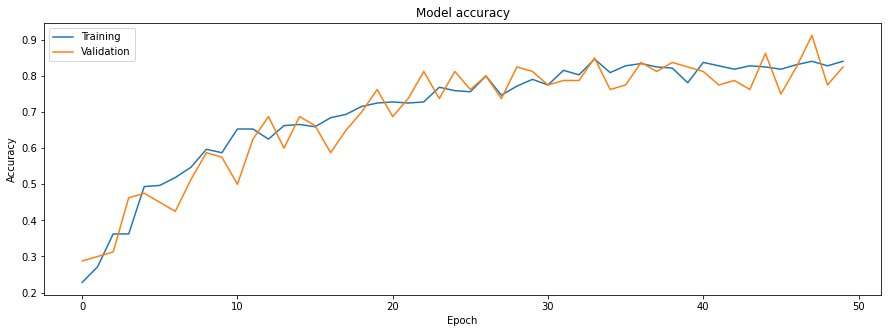

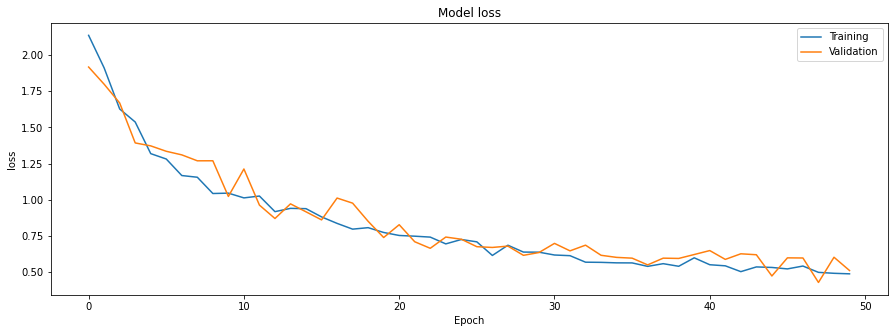

In [22]:
if True: # set to False to skip and go to next parts of code
    report_results(vgg_model, np.array(y_tests[LABEL]), y_predicted)
    plotModelHistory(history_vgg)

# The next model which is ofcoures better that the previous one is ResNet50

In [ ]:
if True: # set to False to skip and go to next parts of code
    from keras.applications.resnet import ResNet50
    resnet50 = ResNet50(input_shape=image_shape, include_top=False, weights='imagenet')

    for layer in resnet50.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(resnet50.output)
    predictions = Dense(5, activation='softmax')(x)

    resnet_model = Model(inputs = resnet50.input, outputs = predictions)

    resnet_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

    history_resnet50 = resnet_model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=50,
        verbose=2,
        callbacks=callbacks
    )

Epoch 1/50
10/10 - 13s - loss: 1.8190 - accuracy: 0.1719 - val_loss: 1.6021 - val_accuracy: 0.2000 - 13s/epoch - 1s/step
Epoch 2/50
10/10 - 8s - loss: 1.5404 - accuracy: 0.3125 - val_loss: 1.3995 - val_accuracy: 0.4000 - 8s/epoch - 808ms/step
Epoch 3/50
10/10 - 8s - loss: 1.3757 - accuracy: 0.4250 - val_loss: 1.3874 - val_accuracy: 0.4375 - 8s/epoch - 815ms/step
Epoch 4/50
10/10 - 8s - loss: 1.2297 - accuracy: 0.5781 - val_loss: 1.2921 - val_accuracy: 0.5250 - 8s/epoch - 808ms/step
Epoch 5/50
10/10 - 8s - loss: 1.1470 - accuracy: 0.6000 - val_loss: 1.1848 - val_accuracy: 0.5500 - 8s/epoch - 803ms/step
Epoch 6/50
10/10 - 8s - loss: 1.0766 - accuracy: 0.6156 - val_loss: 1.0966 - val_accuracy: 0.6000 - 8s/epoch - 804ms/step
Epoch 7/50
10/10 - 9s - loss: 1.0464 - accuracy: 0.6187 - val_loss: 1.0147 - val_accuracy: 0.6750 - 9s/epoch - 883ms/step
Epoch 8/50
10/10 - 8s - loss: 0.9734 - accuracy: 0.6844 - val_loss: 1.0148 - val_accuracy: 0.6625 - 8s/epoch - 807ms/step
Epoch 9/50
10/10 - 8s - l

## Now Evaluating

In [ ]:
if True: # set to False to skip and go to next parts of code
    y_predicted = resnet_model.predict(test_generator)
    _ = resnet_model.evaluate(test_generator)

4/4 [==============================] - 1s 182ms/step - loss: 0.3365 - accuracy: 0.8800


Accuracy score: 0.92
              precision    recall  f1-score   support

          Ak       0.95      0.90      0.92        20
   Ala_Idris       1.00      0.75      0.86        20
     Buzgulu       0.83      1.00      0.91        20
      Dimnit       0.95      0.95      0.95        20
       Nazli       0.91      1.00      0.95        20

    accuracy                           0.92       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100



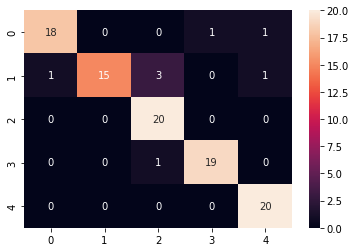

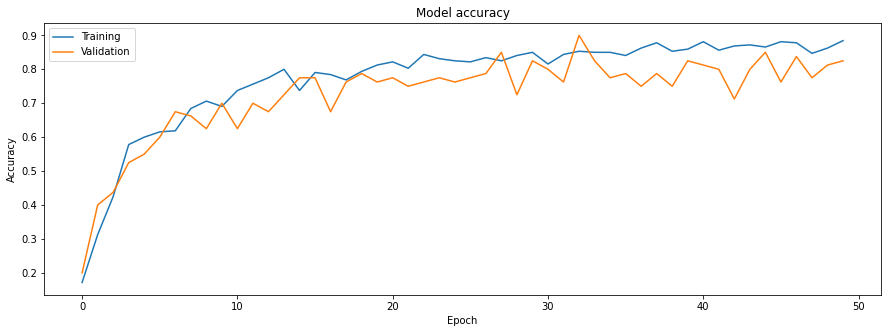

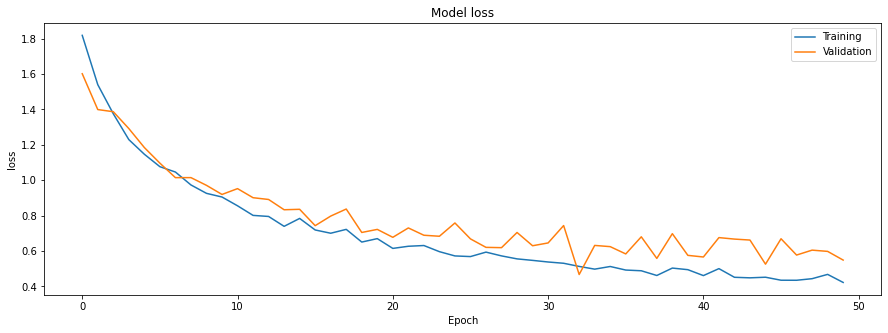

In [ ]:
if True: # set to False to skip and go to next parts of code
    report_results(resnet_model, np.array(y_tests[LABEL]), y_predicted)
    plotModelHistory(history_resnet50)



# The next model which turns out to be the best is EfficientNetB3 which takes more complexity to build

In [31]:
from tensorflow.keras.optimizers import Adam, Adamax
from keras.layers import BatchNormalization, Dropout
from keras import regularizers
if True: # set to False to skip and go to next parts of code
    model_name = 'EfficientNetB3'
    base_model = tf.keras.applications.efficientnet.EfficientNetB3(weights="imagenet", pooling='max', include_top=False, input_shape=image_shape) 
    base_model.trainable = True

    x = base_model.output
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
    x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x = Dropout(rate=.4, seed=123)(x)       
    output = Dense(5, activation='softmax')(x)
    EfficientNet_model = Model(inputs=base_model.input, outputs=output)
    lr = 0.001
    EfficientNet_model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 
            
    epochs = 50

    history = EfficientNet_model.fit(x=train_generator,  epochs=epochs, verbose=1, validation_data=val_generator,
                validation_steps=None,  shuffle=False,  initial_epoch=0, callbacks = callbacks)


Epoch 1/50
10/10 [==============================] - 41s 2s/step - loss: 9.5012 - accuracy: 0.4344 - val_loss: 11.3344 - val_accuracy: 0.2875
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 8.4377 - accuracy: 0.6938 - val_loss: 11.8021 - val_accuracy: 0.3750
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 8.1323 - accuracy: 0.7344 - val_loss: 11.1120 - val_accuracy: 0.4375
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 7.6528 - accuracy: 0.8125 - val_loss: 10.6090 - val_accuracy: 0.4000
Epoch 5/50
10/10 [==============================] - 12s 1s/step - loss: 7.3907 - accuracy: 0.8719 - val_loss: 10.1761 - val_accuracy: 0.3750
Epoch 6/50
10/10 [==============================] - 12s 1s/step - loss: 7.1000 - accuracy: 0.8719 - val_loss: 8.9470 - val_accuracy: 0.4500
Epoch 7/50
10/10 [==============================] - 12s 1s/step - loss: 6.8389 - accuracy: 0.8969 - val_loss: 8.3635 - val_accuracy: 0.5500
Epoch 8/50
10/1

# Evaluating

In [32]:
if True: # set to False to skip and go to next parts of code
    y_predicted = EfficientNet_model.predict(test_generator)
    _ = EfficientNet_model.evaluate(test_generator)

4/4 [==============================] - 1s 179ms/step - loss: 2.1466 - accuracy: 0.8600


Accuracy score: 0.86
              precision    recall  f1-score   support

          Ak       1.00      0.65      0.79        20
   Ala_Idris       1.00      0.70      0.82        20
     Buzgulu       0.71      1.00      0.83        20
      Dimnit       0.77      1.00      0.87        20
       Nazli       1.00      0.95      0.97        20

    accuracy                           0.86       100
   macro avg       0.90      0.86      0.86       100
weighted avg       0.90      0.86      0.86       100



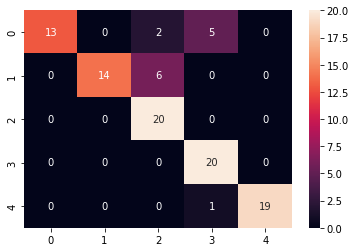

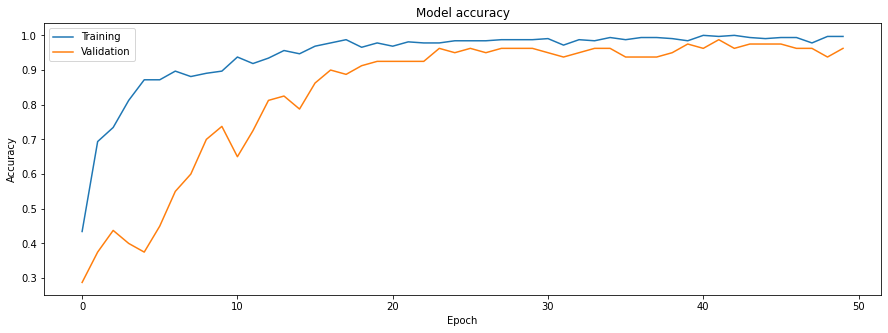

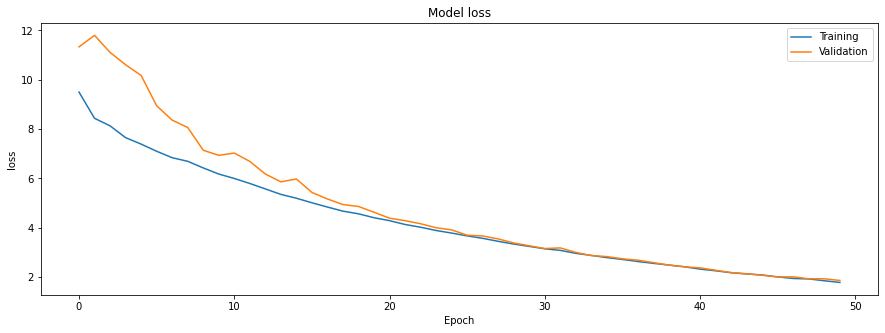

In [33]:
if True: # set to False to skip and go to next parts of code
    report_results(EfficientNet_model, np.array(y_tests[LABEL]), y_predicted)
    plotModelHistory(history)

# Now we do a 10fold-cross-validation with our best model

In [ ]:
new_x_trains = pd.concat([x_trains, x_validations])
new_y_trains = pd.concat([y_trains, y_validations])

new_df = pd.concat([new_x_trains, new_y_trains], axis=1)
new_df = new_df.sample(frac=1)

new_x_trains = new_df[PATH]
new_y_trains = new_df[LABEL]

kf_accuracies = []
kf_losses = []

for i in range(10):
    print(f"===================================fold {i+1}:========================================")
    kf_x_valid = new_x_trains.iloc[i*40:i*40+40]
    kf_x_train = pd.concat([new_x_trains.iloc[0:i*40],new_x_trains.iloc[i*40+40:]])
    kf_y_valid = new_y_trains.iloc[i*40:i*40+40]
    kf_y_train = pd.concat([new_y_trains.iloc[0:i*40],new_y_trains.iloc[i*40+40:]])

    kf_train_data = pd.concat([kf_x_train, kf_y_train], axis=1)
    kf_valid_data = pd.concat([kf_x_valid, kf_y_valid], axis=1)


    kf_train_generator = data_generator.flow_from_dataframe(
        kf_train_data, 
        x_col=PATH,
        y_col=LABEL,
        target_size=image_size, 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
    )

    kf_valid_generator = test_data_generator.flow_from_dataframe(
        kf_valid_data, 
        x_col=PATH,
        y_col=LABEL,
        target_size=image_size, 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
    )

    base_model=tf.keras.applications.efficientnet.EfficientNetB3(weights="imagenet", pooling='max', include_top=False, input_shape=image_shape) 
    base_model.trainable = True
    x = base_model.output
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
              bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x = Dropout(rate=0.4, seed=123)(x)       
    output = Dense(5, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    lr = 0.001
    model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

    epochs = 40

    history = model.fit(x=kf_train_generator,  epochs=epochs, verbose=1,
                validation_steps=None,  shuffle=False,  initial_epoch=0, callbacks=callbacks)
    
    valid_pred = model.evaluate(kf_valid_generator, verbose=0)
    test_pred = model.evaluate(test_generator, verbose=0)
    
    print("result on validation:", valid_pred[1])
    print("result on test:", test_pred[1])

    kf_accuracies.append(valid_pred[1] * 100)
    kf_losses.append(valid_pred[0])




===================================fold 1:========================================
Found 360 validated image filenames belonging to 5 classes.
Found 40 validated image filenames belonging to 5 classes.
Epoch 1/40
12/12 [==============================] - 22s 749ms/step - loss: 9.6404 - accuracy: 0.3833
Epoch 2/40
12/12 [==============================] - 9s 751ms/step - loss: 8.6849 - accuracy: 0.6556
Epoch 3/40
12/12 [==============================] - 10s 759ms/step - loss: 8.2012 - accuracy: 0.7111
Epoch 4/40
12/12 [==============================] - 10s 809ms/step - loss: 7.8066 - accuracy: 0.7778
Epoch 5/40
12/12 [==============================] - 12s 952ms/step - loss: 7.5298 - accuracy: 0.8194
Epoch 6/40
12/12 [==============================] - 10s 766ms/step - loss: 7.2864 - accuracy: 0.8306
Epoch 7/40
12/12 [==============================] - 10s 753ms/step - loss: 6.9782 - accuracy: 0.8750
Epoch 8/40
12/12 [==============================] - 10s 761ms/step - loss: 6.7940 - accura

In [ ]:
print(f"Accuracies: {kf_accuracies}")
print(f"Losses: {kf_losses}")

print(f"Average of accuracies: {np.mean(kf_accuracies)}")
print(f"Average of losses: {np.mean(kf_losses)}")

Accuracies: [0.9113, 0.9317, 0.9189, 0.9433, 0.9633, 0.9705, 0.9398, 0.9483, 0.9597, 0.9691]
Losses: [3.15283999, 2.97926519, 3.08569868, 2.94691874, 2.95199153, 2.95831778, 3.05236261, 2.94782078, 2.87663417, 3.00295017]
Average of accuracies: 0.9455899999999999
Average of losses: 2.995479964
